In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.reset_defaults()

In [31]:
# Read file
measure_name = 'VUS_PR'
df = pd.read_csv('../../results/accuracy/all_accuracy_{}.csv'.format(measure_name), index_col=0)
df = df.set_index(['dataset', 'filename'])
df

NORMA  IFOREST1   IFOREST        MP  \
dataset filename                                                                
Daphnet S01R02E0.test.csv@4.out        0.198065  0.055081  0.055895  0.149085   
        S02R01E0.test.csv@3.out        0.266148  0.220559  0.436835  0.171883   
        S03R01E1.test.csv@2.out        0.133152  0.443217  0.481405  0.134326   
        S03R01E1.test.csv@4.out        0.133279  0.473794  0.519852  0.133948   
        S03R01E1.test.csv@7.out        0.132663  0.426419  0.509005  0.132747   
...                                         ...       ...       ...       ...   
YAHOO   Yahoo_A2synthetic_79_data.out  0.384001  0.642029  0.003151  0.016793   
        Yahoo_A2synthetic_7_data.out   0.005119  0.539482  0.004203  0.011321   
        Yahoo_A2synthetic_89_data.out  0.297793  0.664473  0.016116  0.070607   
        Yahoo_A2synthetic_91_data.out  0.023217  0.564564  0.563784  0.003529   
        Yahoo_A2synthetic_93_data.out  0.003109  0.518293  0.044038  0.001677   

                                           HBOS      POLY     OCSVM        AE  \
dataset filename                                                                
Daphnet S01R02E0.test.csv@4.out        0.044397  0.053686  0.052545  0.081305   
        S02R01E0.test.csv@3.out        0.439032  0.322560  0.158916  0.129705   
        S03R01E1.test.csv@2.out        0.434777  0.486815  0.237568  0.229873   
        S03R01E1.test.csv@4.out        0.477152  0.525571  0.226820  0.151449   
        S03R01E1.test.csv@7.out        0.436821  0.560477  0.216212  0.142420   
...                                         ...       ...       ...       ...   
YAHOO   Yahoo_A2synthetic_79_data.out  0.009280  0.346554  0.043412  0.006404   
        Yahoo_A2synthetic_7_data.out   0.004529  0.346554  0.621320  0.002769   
        Yahoo_A2synthetic_89_data.out  0.008322  0.160813  0.014421  0.053064   
        Yahoo_A2synthetic_91_data.out  0.648422  0.619917  0.503619  0.503619   
        Yahoo_A2synthetic_93_data.out  0.518453  0.603465  0.501457  0.501457   

                                            PCA       LOF  ...     ratio  \
dataset filename                                           ...             
Daphnet S01R02E0.test.csv@4.out        0.048433  0.238604  ...  0.053715   
        S02R01E0.test.csv@3.out        0.503951  0.448590  ...  0.138164   
        S03R01E1.test.csv@2.out        0.452862  0.116856  ...  0.219894   
        S03R01E1.test.csv@4.out        0.425919  0.252775  ...  0.219894   
        S03R01E1.test.csv@7.out        0.440150  0.279481  ...  0.219894   
...                                         ...       ...  ...       ...   
YAHOO   Yahoo_A2synthetic_79_data.out  0.004405  0.047121  ...  0.002815   
        Yahoo_A2synthetic_7_data.out   0.003815  0.003686  ...  0.002815   
        Yahoo_A2synthetic_89_data.out  0.019221  0.177127  ...  0.006334   
        Yahoo_A2synthetic_91_data.out  0.509441  0.681231  ...  0.002815   
        Yahoo_A2synthetic_93_data.out  0.518635  0.759581  ...  0.000704   

                                       nb_anomaly  average_anom_length  \
dataset filename                                                         
Daphnet S01R02E0.test.csv@4.out               5.0           309.400000   
        S02R01E0.test.csv@3.out               9.0           393.000000   
        S03R01E1.test.csv@2.out              23.0           342.652174   
        S03R01E1.test.csv@4.out              23.0           342.652174   
        S03R01E1.test.csv@7.out              23.0           342.652174   
...                                           ...                  ...   
YAHOO   Yahoo_A2synthetic_79_data.out         2.0             2.000000   
        Yahoo_A2synthetic_7_data.out          2.0             2.000000   
        Yahoo_A2synthetic_89_data.out         3.0             3.000000   
        Yahoo_A2synthetic_91_data.out         2.0             2.000000   
        Yahoo_A2synthetic_93_data.out         1.0        

In [32]:
# Set up methods' colors
methods_colors = {
    "oracle": "#FFFFFF",  # 70FF00 (old bright green color)
    "avg_ens": "#FF7133", #FF7133 -> FF9664 (lighter)
    "best_ms": "#33D4FF",
    "detectors": "#CCCCCC",
    "feature_based": "#91AAC2",
    "sit": "#FFB522",
    "conv": "#4494FF",
    "conv_2": "#0048FF",
    "rocket": "#EA7DFF", #B400FF -> D800FF -> EA7DFF(lighter)
    "best_ad_train": "#228B22",
    "worst_ad_test": "#8B0000",
}

In [33]:
# Define methods
methods_conv = [
    'inception_time_{}',
    'convnet_{}',
    'resnet_{}',]

methods_sit = [
    'sit_conv_{}',
    'sit_linear_{}',
    'sit_stem_{}',
    'sit_stem_relu_{}',]

methods_ts = ['rocket_{}']

methods_feature = [
    'ada_boost_{}',
    'knn_{}',
    'decision_tree_{}',
    'random_forest_{}',
    'mlp_{}',
    'bayes_{}',
    'qda_{}',
    'svc_linear_{}']

old_methods = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM','PCA', 'AE', 'CNN', 'LSTM', 'POLY']

base_methods = ['Avg Ens', 'Oracle']

probs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
all_length = [16, 32, 64, 128, 256, 512, 768, 1024]
# oracle_types = ['true', 'lucky', 'unlucky', 'best-3', 'best-4', 'best-5', 'best-6', 'best-7', 'best-8', 'best-9', 'best-10']
oracle_types = ['true', 'lucky', 'unlucky', 'best-3', 'best-4']
oracle_linestyles = ['solid', 'dashed', 'dashed', 'dotted', 'dotted']

all_methods_ens = [meth.format(length) for meth in methods_conv for length in all_length]
all_methods_ens += [meth.format(length) for meth in methods_sit for length in all_length]
all_methods_ens += [meth.format(length) for meth in methods_ts for length in all_length]
all_methods_ens += [meth.format(length) for meth in methods_feature for length in all_length]

all_methods = old_methods + base_methods + all_methods_ens

# Create a list of all different classes of methods
split = [x.rsplit('_', 1)[0] for x in all_methods]
used = set()
all_methods_class = [x for x in split if x not in used and (used.add(x) or True)]

### Define camera-ready method names

In [34]:
template_names = {
    'inception_time_{}': 'InceptTime-{}',
    'convnet_{}': 'ConvNet-{}',
    'resnet_{}': 'ResNet-{}',
    'sit_conv_{}': 'SiT-conv-{}',
    'sit_linear_{}': 'SiT-linear-{}',
    'sit_stem_{}': 'SiT-stem-{}',
    'sit_stem_relu_{}': 'SiT-stem-ReLU-{}',
    'rocket_{}': 'Rocket-{}',
    'ada_boost_{}': 'AdaBoost-{}',
    'knn_{}': 'kNN-{}',
    'decision_tree_{}': 'DecisionTree-{}',
    'random_forest_{}': 'RandomForest-{}',
    'mlp_{}': 'MLP-{}',
    'bayes_{}': 'Bayes-{}',
    'qda_{}': 'QDA-{}',
    'svc_linear_{}': 'SVC-{}',
    'IFOREST': 'IForest',
    'LOF': 'LOF',
    'MP': 'MP',
    'NORMA': 'NormA',
    'IFOREST1': 'IForest1',
    'HBOS': 'HBOS',
    'OCSVM': 'OCSVM',
    'PCA': 'PCA',
    'AE': 'AE',
    'CNN': 'CNN',
    'LSTM': 'LSTM',
    'POLY': 'POLY',
    'Avg Ens': 'Avg Ens',
    'Oracle': 'Oracle',
    'best_ms': 'Best MS',
    'VUS_PR': 'VUS-PR',
    'label': 'Label',
    'best_ms': 'Best MS',
    'convnet': 'ConvNet',
    'resnet': 'ResNet',
    'rocket': 'Rocket',
    'knn': 'kNN',
    'sit_stem': 'SiT-stem',
    'sit': 'SiT',
    'feature_based': 'Feature-based',
    'AUC_PR': 'AUC-PR',
}

final_names = {}
for length in all_length:
    for key, value in template_names.items():
        if '{}' in key:
            new_key = key.format(length)
            new_value = value.format(length)
            final_names[new_key] = new_value
        else:
            final_names[key] = value

In [35]:
def read_oracle(measure, oracle_type='true'):
    result = None
    
    for prob in probs:
        # Read Oracle
        df = pd.read_csv(f"../../data/TSB/metrics/{oracle_type.upper()}_ORACLE-{prob}/{measure}.csv")
        
        # Fix new index
        new_index = df['Unnamed: 0'].str.split(pat='/', n=1, expand=True)
        new_index = tuple(map(tuple, new_index.values))
        new_index = pd.MultiIndex.from_tuples(new_index, names=['dataset', 'filename'])
        df = df.drop(labels='Unnamed: 0', axis=1)
        df.index = new_index
        
        # Concat results
        if result is None:
            result = df
        else:
            result = pd.concat([result, df], axis=1)
      
    return result

# Read all Oracles (every type, every probability)
oracles = None
for oracle_type in oracle_types:
    curr_oracle = read_oracle(measure=measure_name, oracle_type=oracle_type)
    if oracles is None:
        oracles = curr_oracle
    else:
        oracles = pd.concat([oracles, curr_oracle], axis=1)
oracles

TRUE_ORACLE-0  TRUE_ORACLE-5  \
dataset filename                                                      
Daphnet S01R02E0.test.csv@1.out             0.055114       0.055114   
        S01R02E0.test.csv@4.out             0.048433       0.052545   
        S01R02E0.test.csv@6.out             0.140390       0.139000   
        S02R01E0.test.csv@3.out             0.129705       0.436835   
        S02R01E0.test.csv@4.out             0.272333       0.443827   
...                                              ...            ...   
YAHOO   Yahoo_A2synthetic_96_data.out       0.001569       0.001148   
        Yahoo_A2synthetic_97_data.out       0.067920       0.594011   
        Yahoo_A2synthetic_98_data.out       0.005576       0.670879   
        Yahoo_A2synthetic_99_data.out       0.007725       0.007725   
        Yahoo_A2synthetic_9_data.out        0.001737       0.002306   

                                       TRUE_ORACLE-10  TRUE_ORACLE-15  \
dataset filename                                                        
Daphnet S01R02E0.test.csv@1.out              0.040967        0.082064   
        S01R02E0.test.csv@4.out              0.149085        0.198065   
        S01R02E0.test.csv@6.out              0.211211        0.211211   
        S02R01E0.test.csv@3.out              0.171883        0.130015   
        S02R01E0.test.csv@4.out              0.126867        0.159985   
...                                               ...             ...   
YAHOO   Yahoo_A2synthetic_96_data.out        0.001678        0.519939   
        Yahoo_A2synthetic_97_data.out        0.003623        0.006596   
        Yahoo_A2synthetic_98_data.out        0.695926        0.718101   
        Yahoo_A2synthetic_99_data.out        0.603465        0.001550   
        Yahoo_A2synthetic_9_data.out         0.019417        0.519903   

                                       TRUE_ORACLE-20  TRUE_ORACLE-25  \
dataset filename                                                        
Daphnet S01R02E0.test.csv@1.out              0.039687        0.039687   
        S01R02E0.test.csv@4.out              0.048433        0.053686   
        S01R02E0.test.csv@6.out              0.039139        0.040427   
        S02R01E0.test.csv@3.out              0.158916        0.322560   
        S02R01E0.test.csv@4.out              0.443827        0.272333   
...                                               ...             ...   
YAHOO   Yahoo_A2synthetic_96_data.out        0.008616        0.008730   
        Yahoo_A2synthetic_97_data.out        0.503128        0.044694   
        Yahoo_A2synthetic_98_data.out        0.670879        0.506484   
        Yahoo_A2synthetic_99_data.out        0.001456        0.001036   
        Yahoo_A2synthetic_9_data.out         0.856541        0.533921   

                                       TRUE_ORACLE-30  TRUE_ORACLE-35  \
dataset filename                                                        
Daphnet S01R02E0.test.csv@1.out              0.109180        0.050942   
        S01R02E0.test.csv@4.out              0.238604        0.149085   
        S01R02E0.test.csv@6.out              0.139000        0.106843   
        S02R01E0.test.csv@3.out              0.322560        0.448590   
        S02R01E0.test.csv@4.out              0.233692        0.272333   
...                                               ...             ...   
YAHOO   Yahoo_A2synthetic_96_data.out        0.518806        0.008616   
        Yahoo_A2synthetic_97_data.out        0.003623        0.003623   
        Yahoo_A2synthetic_98_data.out        0.616262        0.005576   
        Yahoo_A2synthetic_99_data.out        0.001051        0.001051   
        Yahoo_A2synthetic_9_data.out         0.518421        0.001479   

                                       TRUE_ORACLE-40  TRUE_ORACLE-45  ...  \
dataset filename                                                       ...   
Daphnet S01R02E0.test.csv@1.out              0.054810        0.350472  ...   
        S01R02E0.test.csv@4.out

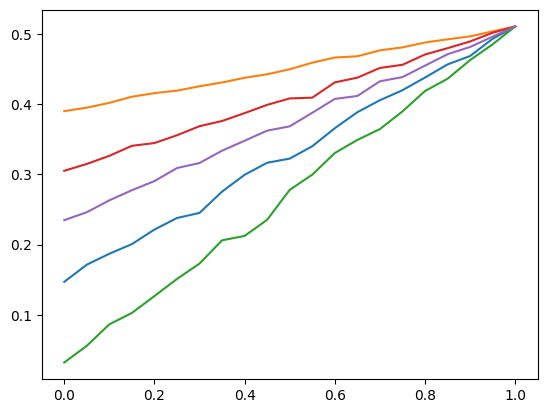

In [36]:
def oracle_to_plot(oracles, oracle_type, probs, style='--'):
    # Transform to probabilities
    real_probs = [x/100 for x in probs]
    
    # Select current oracle type
    curr_oracles = oracles.filter(regex=oracle_type.upper())
    
    # Create values for plot
    sorted_vals = np.array([[x, y] for x, y in sorted(zip(real_probs, curr_oracles.mean(numeric_only=True).values))])
    sorted_vals_df = pd.DataFrame(sorted_vals, columns=['probs', oracle_type.upper()])
    sorted_vals_df = sorted_vals_df.set_index('probs')
    
    return sorted_vals_df

# Turn Oracle data to Acc - VUS_PR plot data
oracle_plots = None
for oracle_type in oracle_types:
    res = oracle_to_plot(oracles=oracles, oracle_type=oracle_type, probs=probs)
    if oracle_plots is None:
        oracle_plots = res
    else:
        oracle_plots = pd.concat([oracle_plots, res], axis=1)

# Create example plot
for oracle_type in oracle_types:
    plt.plot(oracle_plots[oracle_type.upper()])
plt.show()

# Create scatter plots data

In [37]:
def compute_scatter_values(df, oracles):

    # Create oracles' plot data
    oracle_plots = None
    for oracle_type in oracle_types:
        res = oracle_to_plot(oracles=oracles, oracle_type=oracle_type, probs=probs)
        if oracle_plots is None:
            oracle_plots = res
        else:
            oracle_plots = pd.concat([oracle_plots, res], axis=1)

    labels = df['label']
    scatter_plot_res = {}
    # Create scatter plot
    for length in all_length:
        for method in all_methods_ens:
            curr_method = method.format(length)
            curr_method_values = df[curr_method]
            curr_method_class = df[curr_method + '_class']
            scatter_plot_res[method] = [(labels == curr_method_class).mean(), curr_method_values.mean()]
    
    return scatter_plot_res, oracle_plots

# compute_scatter_values(df, oracles)

# Create Final plot

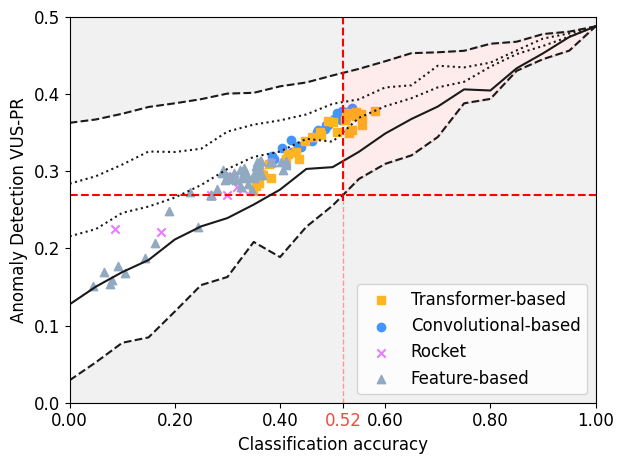

In [41]:
def create_scatter_plot(df, oracles, dataset=None, minimal=False):
    
    # Keep the results according to the dataset requested
    if dataset is None:
        df_oracles = oracles.loc[df.index]
    else:
        df = df.loc[[dataset]]
        df_oracles = oracles.loc[df.index]
    
    # Compute scatter plot values
    scatter_plot_res, oracle_plots = compute_scatter_values(df, df_oracles)
    
    # Create scatter plot
    for method in all_methods_ens:
        if method.rsplit('_', 1)[0] in [x.rsplit('_', 1)[0] for x in methods_sit]:
            sit_point = plt.scatter(*scatter_plot_res[method], color=methods_colors['sit'], marker='s')
        elif method.rsplit('_', 1)[0] in [x.rsplit('_', 1)[0] for x in methods_conv]:
            conv_point = plt.scatter(*scatter_plot_res[method], color=methods_colors['conv'], marker='o')
        elif method.rsplit('_', 1)[0] in [x.rsplit('_', 1)[0] for x in methods_ts]:
            rocket_point = plt.scatter(*scatter_plot_res[method], color=methods_colors['rocket'], marker='x')
        elif method.rsplit('_', 1)[0] in [x.rsplit('_', 1)[0] for x in methods_feature]:
            feature_point = plt.scatter(*scatter_plot_res[method], color=methods_colors['feature_based'], marker='^')

    # Add best AD horizontal line
    best_ad_value = df[old_methods].mean(numeric_only=False).max()
    plt.axhline(best_ad_value, c='red', linestyle='--')
    
    if not minimal:
        # Create Oracles plot
        for oracle_type, style in zip(oracle_types, oracle_linestyles):
            g = plt.plot(oracle_plots[oracle_type.upper()], color='k', linestyle=style)[0]
        
        # Paint grey area 
        x = oracle_plots.index.values
        y_top = np.ones(x.shape)
        y_lucky = oracle_plots['LUCKY'].values
        y_unlucky = oracle_plots['UNLUCKY'].values
        plt.fill_between(x, y_top, y_lucky, interpolate=True, color='lightgrey', alpha=0.3)
        plt.fill_between(x, y_unlucky, interpolate=True, color='lightgrey', alpha=0.3)
    
        # Add best AD vertical line
        x_resample = np.linspace(0, 1, 1000)
        y_lucky_resample = np.interp(x_resample, x, y_lucky)
        y_unlucky_resample = np.interp(x_resample, x, y_unlucky)
        best_ad_unlucky_intersect = np.argwhere(np.diff(np.sign(best_ad_value - y_unlucky_resample))).flatten()[0]
        y_unlucky_resample_norm = (y_unlucky_resample - np.min(y_unlucky_resample)) / (np.max(y_unlucky_resample) - np.min(y_unlucky_resample))
        plt.axvline(x=x_resample[best_ad_unlucky_intersect], ymin=y_unlucky_resample_norm[best_ad_unlucky_intersect], ymax=1, c='red', linestyle='--')
        plt.axvline(x=x_resample[best_ad_unlucky_intersect], ymin=0, ymax=y_unlucky_resample_norm[best_ad_unlucky_intersect], c='#F5493C', alpha=0.5, linestyle='--', linewidth=1)
        
        # Paint red area
        plt.fill_between(x_resample, y_lucky_resample, y_unlucky_resample, where=x_resample>x_resample[best_ad_unlucky_intersect], interpolate=True, color="#F5493C", alpha=0.1)
    
        # Add extra xtick
        plt.xticks(list(plt.xticks()[0]) + [x_resample[best_ad_unlucky_intersect]])
        new_xticks_labels = []
        for i, tick_label in enumerate(g.axes.get_xticklabels()):
            value = float(tick_label.get_text())

            if i == len(g.axes.get_xticklabels())-1:
                tick_label.set_color("#F5493C")
                tick_label.set_text(str(round(value, 2)))
            else:
                tick_label.set_text(str(round(value, 1)))
            new_xticks_labels.append(tick_label)
        g.axes.set_xticklabels(new_xticks_labels)

        plt.legend(
            (sit_point, conv_point, rocket_point, feature_point),
            ('Transformer-based', 'Convolutional-based', 'Rocket' , 'Feature-based')
        )
    
    # Set up plot
    plt.xlabel('Classification accuracy')
    plt.ylabel('Anomaly Detection {}'.format(final_names[measure_name]))
    plt.tight_layout()
    
# Generate the Acc - Dec figure for the entire test set
# plt.clf()
plt.rcParams.update({'font.size': 12})
plt.xlim(0, 1)
plt.ylim(0, .5)

create_scatter_plot(df, oracles, dataset=None)
plt.show()
plt.close()

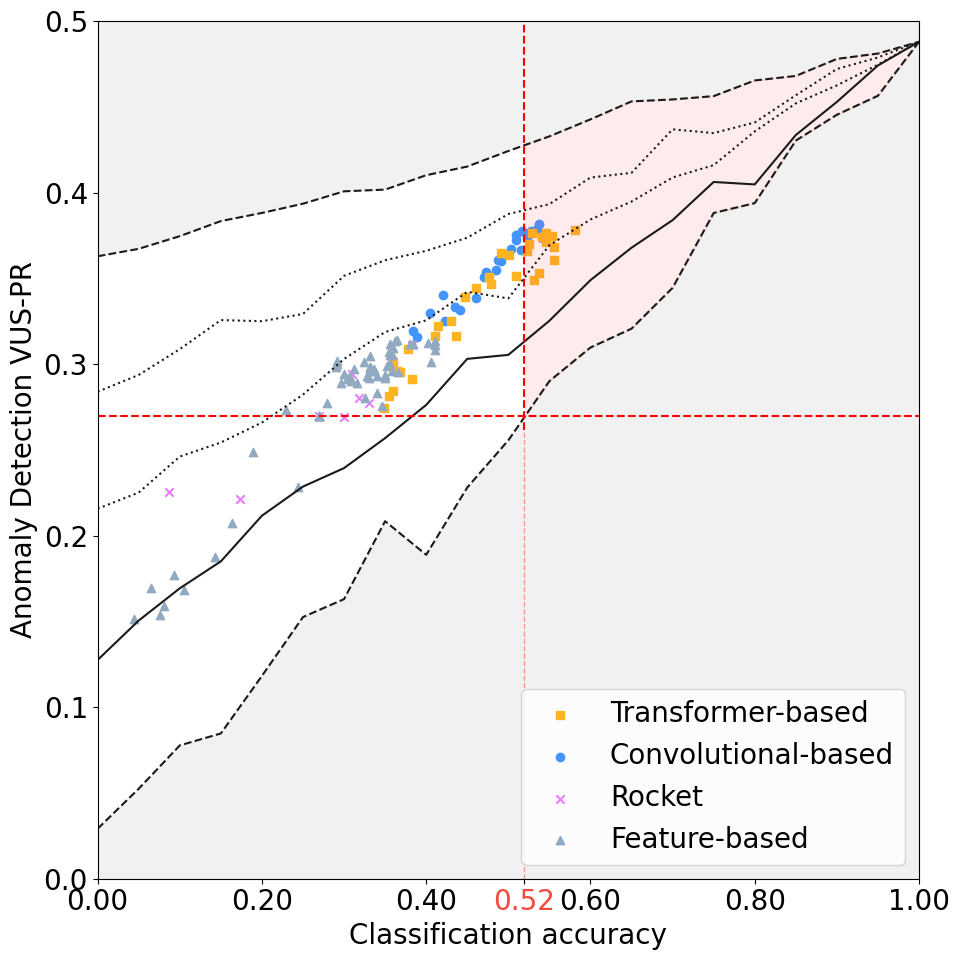

In [39]:
# Generate the Acc - Dec figure for the entire test set
# plt.clf()
plt.figure(figsize=(10, 10))
# plt.rcParams['figure.dpi'] = 500
plt.rcParams.update({'font.size': 20})
plt.xlim(0, 1)
plt.ylim(0, .5)

create_scatter_plot(df, oracles, dataset=None)
plt.show()
plt.close()

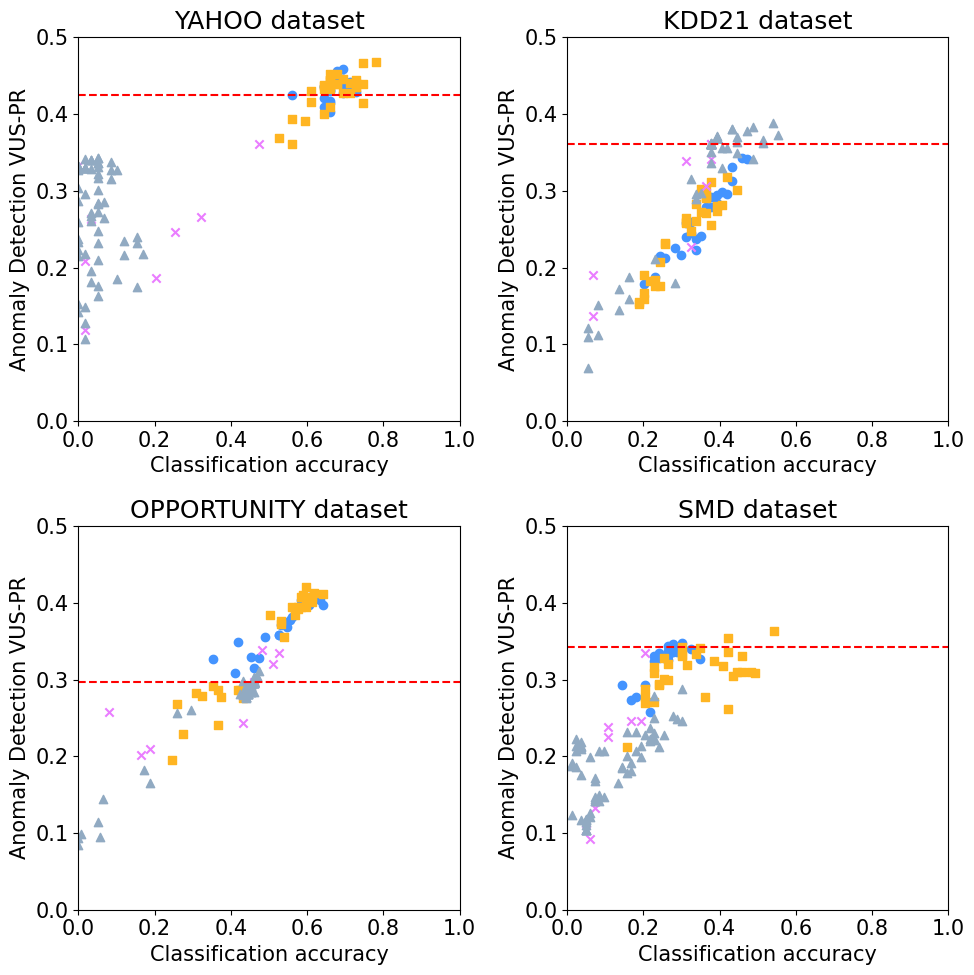

In [44]:
# Generate the Acc - Dec figure for individual datasets
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})

for i, dataset in enumerate(['YAHOO','KDD21', 'OPPORTUNITY', 'SMD']):#,'GHL','SVDB']):
    plt.subplot(2, 2, i + 1)
    plt.xlim(0, 1)
    plt.ylim(0, .5)
    create_scatter_plot(df, oracles, dataset=dataset, minimal=True)
    plt.title(f"{dataset} dataset")
plt.show()
plt.close()